In [4]:
monisha = True
loc = '/content/drive/My Drive/6.871 ML with HC/Project/' if monisha else '/content/drive/My Drive/Project/'

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc

In [5]:
import torch
!pip install transformers
from transformers import *

     |████████████████████████████████| 645kB 2.7MB/s 
     |████████████████████████████████| 890kB 13.2MB/s 
     |████████████████████████████████| 3.8MB 21.4MB/s 
     |████████████████████████████████| 1.0MB 38.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=f347886c9b4d383960777af0e6c3d420ac2efc601f5f46c43bda8ef7f451b148
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [6]:
# https://huggingface.co/emilyalsentzer/Bio_ClinicalBERT
# Recitation Example: https://colab.research.google.com/drive/1dluu2EDp9NuE8FzMnw4M_6lQ66lcX-nh#scrollTo=h83JKPFeTZ4k
# Use Bio_Clinical BERT (trained on MIMIC III) through the transformers library
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

In [0]:
def obtain_BERT_embeddings_new(txt, abbrev):
  #given a text with a unique abbrev, returns the BERT embeding of abbrev. 
  tokenized_text = tokenizer.encode(txt, add_special_tokens=True)
  tokenized_abbrev = tokenizer.encode(abbrev, add_special_tokens=True)
  #below finds the index corresponding to our abbreviation
  index = [x for x in range(len(tokenized_text)) if tokenized_text[x:x+len(tokenized_abbrev)-2] == tokenized_abbrev[1:-1]][0] 
  input_id = torch.tensor([tokenizer.encode(txt, add_special_tokens=True)])
  ##need to account for possibility if len(input_id)>512. BERT only takes in max token length 512. 
  mode = 0
  if input_id.shape[1]>512:
    temp = input_id[0][0:512-len(tokenized_abbrev)+2].unsqueeze(0)
    temp2 = input_id[0][index:index+len(tokenized_abbrev)-2].unsqueeze(0)
    input_id = torch.cat([temp, temp2], dim=1) # we take the first 500 ish tokens for the sentence, and just append the abbreviation at the end. We will recover the embedding of the end abbreviation. 
    mode = 1
  try:
    if mode == 1:
      embedding = model(input_id)[0][0][512-len(tokenized_abbrev)+2:512].detach().numpy()      
    else:
      embedding = model(input_id)[0][0][index:index+len(tokenized_abbrev)-2].detach().numpy() #we recover the BERT embedding for the abbreviation.
  except IndexError:
    print(txt)
    print(tokenized_text)
    print(tokenized_abbrev)
    print(index)

  return np.mean(embedding, axis=0)

In [0]:
train = pd.read_csv(loc+'/data/train.csv')

In [9]:
# Positive Samples
print('Count of positive samples: ', len(train))
print('Count of uniq long forms: ', len(train[['Abbreviation', 'Long-form']].drop_duplicates()))
print('Count of uniq shrt forms: ', len(train[['Abbreviation']].drop_duplicates()))

Count of positive samples:  8933
Count of uniq long forms:  60
Count of uniq shrt forms:  28


In [0]:
train['label'] = 1

In [11]:
test = [float(i) for i in train['Abbreviation-embedding'].str.replace('\n', '').str[1:-1].str.split()[0]]
print(test)
print(len(test))

[-0.631781578, -0.125749096, 0.0833449513, -0.0850809664, -0.037963111, 0.181134596, 0.125056654, -0.0656851679, -0.243821248, 0.0584203377, -0.211622015, -0.258631438, 0.636508107, 1.09762573, 1.06119454, 0.382613212, -0.30858925, -0.527486742, -0.782356262, -0.894615889, -0.359074295, 0.345362127, -1.02653968, -0.0535583012, -0.160748407, -0.355274439, 0.499130785, 0.634598136, -0.215997338, 0.608353972, -0.158945218, -0.459032208, 0.0119868433, -0.473348618, 0.255241156, 0.860142827, 0.216039374, 0.918462753, 0.0370087139, 0.00508929556, -0.344524533, 0.0538133718, 0.184144363, 0.569886863, 0.310236722, 0.640508235, 0.317487806, 0.523836195, -0.308017462, -0.15422602, 0.71613729, 0.203897402, 0.483258992, -0.426574022, 0.249107495, 0.0101920888, -0.47312054, 0.00297363778, -0.394592583, 0.425560445, -0.604943991, 1.34241331, -0.00616008928, -0.146106347, -0.266255736, 0.0120288115, 0.58891058, 0.282053083, 0.616171718, -0.24626632, -0.14308691, 0.16606164, -0.715582311, 0.281909972,

In [0]:
def string_to_list(string):
  return  [float(i) for i in string.replace('\n', '')[1:-1].split()]
  

train["Abbreviation-embedding"] = train["Abbreviation-embedding"].apply(string_to_list)


In [19]:
x = train.head(2)[['Abbreviation', 'Long-form', 'Text', 'Abbreviation-embedding', 'label']]
x = x.rename(columns={'Long-form': 'Longform', 'Text': 'Note_Text', 'label': 'Label'})
x

,Abbreviation,Longform,Note_Text,Abbreviation-embedding,Label
0,IM,intramuscular,20. Fosamax 70 mg p.o. every Sunday. 21. Calca...,"[-0.631781578, -0.125749096, 0.0833449513, -0....",1
1,IM,intramuscular,The patient's hyperglycemia is well controlled...,"[-0.139056817, 0.041699525, 0.411994547, 0.213...",1


In [6]:
##generating the list [V1 V2 ... V500]
arr = ["V"+str(i) for i in range(1,501)]
lfembedding = {}
for lf in set(train["Long-form"]):
  lfembedding[lf]=[]
  for i in arr:
    lfembedding[lf].append(train[train["Long-form"]==lf][i].iloc[0])
print(lfembedding)

{'mitral regurgitation': [-0.0502842383487991, 0.0251160197236644, -1.9515639104739104e-17, -0.00158007255885581, -0.0289640818755677, -0.0256168136084739, 0.0392265379918664, -0.010009503114509, 0.0341668607493381, 4.7791631763161e-16, -0.0705720982917673, 0.0502027112104016, 0.0501624287880235, 0.0328228489449054, 0.496915749860095, 0.24204302574602304, -0.69893787718721, -4.64038529823796e-16, 0.0382760682426755, 0.0597450040437956, 0.0534749096973635, 0.0329715048698035, 0.0552595325397141, 0.00892396007936325, -0.0589956289810521, -0.137013658927967, 0.014926471783338, 0.0663730186844144, -0.0957804035866184, -0.0477419808374409, -0.0584039169313389, 0.0516043466298396, -0.0360568646567976, -1.1175088632242599e-14, 0.14441419507943698, 3.38531286336874e-15, -0.0562929540045251, 0.0613957740961781, 0.142927737025228, 0.0610803820585003, 0.0619017056765221, 0.13984530136362, 0.0634190084547953, -0.0306068735816506, 0.19292450861595806, -0.5586702726197329, 0.18169361467011105, 0.040

In [0]:
abbrev_embeddings = {}
for i in set(train["Abbreviation"]):
  # abbrev_embeddings[i] = train[train["Abbreviation"]==i]["Abbreviation-embedding"].mean()
  abbrev_embeddings[i] = np.mean((train[train["Abbreviation"]==i]["Abbreviation-embedding"].tolist()), axis=1)


Next we may form  our positive dataset. Let's form a third dictionary, which remembers relation[Abbrev] = [all possible long forms].

In [22]:
relation = {}
for i in set(train["Abbreviation"]):
  relation[i] = list(train[train["Abbreviation"]==i]["Long-form"].unique())
relation

{'AB': ['arterial blood', 'abortion'],
 'AC': ['acetate',
  'abdominal circumference',
  'assist control',
  'acromioclavicular'],
 'AV': ['arteriovenous', 'aortic valve', 'atrioventricular'],
 'BAL': ['bronchoalveolar lavage'],
 'CA': ['cancer'],
 'CEA': ['carotid endarterectomy', 'carcinoembryonic antigen'],
 'CTA': ['computed tomographic angiography'],
 'CVS': ['cardiovascular system'],
 'DC': ['discharge'],
 'DIP': ['desquamative interstitial pneumonia', 'dipropionate'],
 'DM': ['diabetes mellitus', 'dextromethorphan'],
 'ER': ['estrogen receptor'],
 'FISH': ['fluorescent in situ hybridization'],
 'IM': ['intramuscular', 'intramedullary'],
 'IR': ['internal rotation', 'infrared', 'interventional radiology'],
 'IT': ['intertrochanteric', 'inspiratory time', 'intrathecal'],
 'IVF': ['in vitro fertilization'],
 'LE': ['leukocyte esterase',
  'lupus erythematosus',
  'lymphedema',
  'lower extremity'],
 'MR': ['mental retardation', 'mitral regurgitation', 'magnetic resonance'],
 'OP': 

In [0]:
positive_training_dataset = []
for abbrev in relation:
  abbrev_vector = abbrev_embeddings[abbrev]
  for j in relation[abbrev]:
    positive_training_dataset.append(np.concatenate([abbrev_vector,lfembedding[j]]))

In [24]:
len(positive_training_dataset)

60

Here we see a problem - the way we do this we only have 60 positive samples, corresponding to the fact that we only have access to 60 long forms. 

In theory for each such point, we can generate e.g. 10 negative samples. These negative samples would be 

One problem is that our input dimension is *very* high! 

Generating negative training dataset. Method:
- For each positive training dataset (abbrev, correct long-form), we will find N closest CUI embeddings and consider (abbrev, CUI embedding) to be a negative sample. 

Note that cuitovec_embeddings is 109053 rows x 501 columns. let's first make this to something more usable.

In [25]:
cuitovec_embeddings = pd.read_csv(loc + '/data/cui2vec_pretrained.csv/cui2vec_pretrained.csv')
columns = cuitovec_embeddings.columns.tolist()
columns[0] = 'cui'
cuitovec_embeddings.columns = columns
cuitovec_embeddings.head()

,cui,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,...,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,C0000052,-0.004071,0.002169,-4.466913e-17,-0.006110,-0.001187,0.000047,0.007681,-0.002564,0.012169,8.510987e-17,-0.014761,0.006384,-0.010547,-0.000475,0.113440,0.058907,-0.172463,3.577867e-17,0.030226,0.011987,-0.011368,-0.000577,0.005605,-0.023046,0.004918,-0.017281,0.006766,-0.006453,-0.012901,0.003172,-0.005771,0.000374,0.007419,2.083674e-15,-0.011704,3.789422e-16,-0.004064,-0.004843,-0.009228,...,-0.039812,-0.000721,0.012088,-0.020244,-0.045197,0.022028,-0.017377,-0.010164,0.027401,-0.027074,-0.009841,-0.008304,-0.022221,0.008014,0.042113,-0.006376,0.003216,-0.000478,-0.021727,-0.006052,-0.044035,-0.011598,-0.000728,-0.002857,-0.001882,-0.062140,-0.032667,0.005931,0.025993,0.002573,-0.000316,-0.049984,-0.022582,-0.041039,0.003112,0.025915,-0.065661,0.004741,-0.004502,-0.029053
1,C0000163,-0.008389,0.002486,-3.816392e-17,-0.004083,-0.002875,0.001207,0.005683,0.002054,0.007849,4.466913e-17,-0.018256,-0.007073,-0.017077,-0.001199,0.167938,0.077537,-0.222152,2.829768e-17,0.035000,0.008202,-0.008183,-0.001576,0.003287,-0.021275,-0.000146,-0.026754,0.009185,-0.010848,-0.008649,0.003046,-0.004676,-0.007618,0.017479,4.497271e-15,0.004688,-3.653761e-16,0.001293,-0.007506,-0.014668,...,-0.122614,0.016933,-0.006705,-0.084431,-0.005476,0.094546,0.002108,-0.056572,-0.031406,-0.027577,-0.063415,-0.046911,0.062202,-0.014227,0.043626,0.018565,0.000407,0.071640,-0.081636,0.048380,0.016249,0.080315,0.001227,0.028104,0.126432,-0.069477,0.093670,-0.016682,-0.053828,-0.068102,0.053730,0.048069,-0.058616,-0.013041,-0.005875,-0.000951,-0.007084,0.057521,-0.008791,0.001159
2,C0000167,-0.008328,0.002697,-5.811324e-17,-0.014372,0.004227,0.008176,0.007521,-0.000114,0.012576,5.160802e-17,-0.019601,-0.001929,-0.025697,-0.002323,0.177741,0.085582,-0.251257,2.417771e-17,0.043778,0.010922,-0.017578,-0.002443,-0.002377,-0.027647,0.008433,-0.028108,0.005885,0.001927,-0.015647,0.004871,0.001732,-0.011444,0.028010,7.679621e-15,0.011256,-2.365729e-16,-0.001808,-0.006596,-0.003177,...,-0.150694,0.024891,-0.020137,-0.095877,-0.016489,0.091999,0.041918,-0.074253,-0.066715,0.016389,-0.100696,-0.077692,0.056323,-0.035627,0.083308,0.005769,-0.023710,0.130884,-0.090631,0.067453,0.047582,0.133206,-0.015505,0.040409,0.103901,-0.078273,0.140156,-0.048069,-0.064677,-0.110767,0.031376,0.026515,-0.064476,0.040333,-0.005710,-0.027542,0.003274,0.062406,0.020109,-0.014616
3,C0000172,-0.008589,0.002666,-1.734723e-17,-0.001215,-0.001841,-0.001273,0.002268,-0.000551,0.003284,-1.734723e-17,-0.008908,-0.003391,-0.009277,-0.000646,0.120424,0.058047,-0.149642,-6.548581e-17,0.022889,0.007105,-0.004408,-0.000724,0.004559,-0.016453,0.000134,-0.018702,0.003592,-0.008955,-0.001113,0.002061,0.000749,-0.004816,0.007368,1.804112e-15,0.005697,-5.438358e-16,0.002582,-0.006393,-0.011715,...,-0.058852,0.010184,0.004655,-0.044615,-0.003556,0.041779,0.026221,-0.028523,-0.008309,0.005916,-0.010589,-0.017557,0.032013,-0.006488,0.017609,0.012915,0.011166,0.039392,-0.015757,0.015986,0.043137,0.068181,0.002613,0.019744,0.082578,-0.066852,0.079201,-0.010654,-0.001823,-0.061107,0.007605,0.009991,-0.035895,-0.014936,0.003336,0.001816,-0.007257,0.014691,0.001276,0.001881
4,C0000215,-0.001324,-0.000040,-1.561251e-17,-0.002030,-0.000095,0.000728,0.003543,-0.001463,0.003100,4.856887e-17,-0.007702,0.001152,-0.004783,-0.000706,0.080975,0.039056,-0.120896,5.339696e-17,0.023469,0.007597,-0.009392,0.002006,0.000396,-0.017496,0.000704,-0.018367,0.007816,-0.006682,-0.011598,0.003356,-0.001783,-0.003255,0.007630,1.920230e-15,-0.004014,-2.001437e-16,0.000709,-0.004693,-0.012240,...,0.013234,-0.007240,-0.004495,0.011855,-0.002918,-0.023302,0.006409,-0.014872,-0.0552

In [0]:
##want to make a vector given by concatenating columns..

arr = ["V"+str(i) for i in range(1,501)]
cuitovec_embeddings['vec'] = cuitovec_embeddings[arr].values.tolist()

In [0]:
cuiEmbeddingList = cuitovec_embeddings['vec'].tolist()

In [0]:
cuiEmbeddingList= np.array(cuiEmbeddingList)

## Generate Negative Samples and final aggregated Feature Vector

Step 1: Recover CUI names from cuitovec. 


Step 2: For each long-form that shows up in our data, compute the edit distance between the long-form and longforms which show up from cuitovec. 



Step 3: For a long-form, say "abortion". Take the 10 words with the smalles edit-distances. Call them word1...word10.

a) Regard ('AB', wordi) to be negative samples for each i.
b) Do the same, but perhaps somewhat randomly, for abbreviation-embeddings. 


In [29]:
cuitovec_embeddings

,cui,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,...,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500,vec
0,C0000052,-0.004071,0.002169,-4.466913e-17,-0.006110,-0.001187,0.000047,0.007681,-0.002564,0.012169,8.510987e-17,-0.014761,0.006384,-0.010547,-0.000475,0.113440,0.058907,-0.172463,3.577867e-17,0.030226,0.011987,-0.011368,-0.000577,0.005605,-0.023046,0.004918,-0.017281,0.006766,-0.006453,-0.012901,0.003172,-0.005771,0.000374,0.007419,2.083674e-15,-0.011704,3.789422e-16,-0.004064,-0.004843,-0.009228,...,-0.000721,0.012088,-0.020244,-0.045197,0.022028,-0.017377,-0.010164,0.027401,-0.027074,-0.009841,-0.008304,-0.022221,0.008014,0.042113,-0.006376,0.003216,-0.000478,-0.021727,-0.006052,-0.044035,-0.011598,-0.000728,-0.002857,-0.001882,-0.062140,-0.032667,0.005931,0.025993,0.002573,-0.000316,-0.049984,-0.022582,-0.041039,0.003112,0.025915,-0.065661,0.004741,-0.004502,-0.029053,"[-0.00407116655302633, 0.0021693172123137, -4...."
1,C0000163,-0.008389,0.002486,-3.816392e-17,-0.004083,-0.002875,0.001207,0.005683,0.002054,0.007849,4.466913e-17,-0.018256,-0.007073,-0.017077,-0.001199,0.167938,0.077537,-0.222152,2.829768e-17,0.035000,0.008202,-0.008183,-0.001576,0.003287,-0.021275,-0.000146,-0.026754,0.009185,-0.010848,-0.008649,0.003046,-0.004676,-0.007618,0.017479,4.497271e-15,0.004688,-3.653761e-16,0.001293,-0.007506,-0.014668,...,0.016933,-0.006705,-0.084431,-0.005476,0.094546,0.002108,-0.056572,-0.031406,-0.027577,-0.063415,-0.046911,0.062202,-0.014227,0.043626,0.018565,0.000407,0.071640,-0.081636,0.048380,0.016249,0.080315,0.001227,0.028104,0.126432,-0.069477,0.093670,-0.016682,-0.053828,-0.068102,0.053730,0.048069,-0.058616,-0.013041,-0.005875,-0.000951,-0.007084,0.057521,-0.008791,0.001159,"[-0.00838891614335889, 0.00248644034211525, -3..."
2,C0000167,-0.008328,0.002697,-5.811324e-17,-0.014372,0.004227,0.008176,0.007521,-0.000114,0.012576,5.160802e-17,-0.019601,-0.001929,-0.025697,-0.002323,0.177741,0.085582,-0.251257,2.417771e-17,0.043778,0.010922,-0.017578,-0.002443,-0.002377,-0.027647,0.008433,-0.028108,0.005885,0.001927,-0.015647,0.004871,0.001732,-0.011444,0.028010,7.679621e-15,0.011256,-2.365729e-16,-0.001808,-0.006596,-0.003177,...,0.024891,-0.020137,-0.095877,-0.016489,0.091999,0.041918,-0.074253,-0.066715,0.016389,-0.100696,-0.077692,0.056323,-0.035627,0.083308,0.005769,-0.023710,0.130884,-0.090631,0.067453,0.047582,0.133206,-0.015505,0.040409,0.103901,-0.078273,0.140156,-0.048069,-0.064677,-0.110767,0.031376,0.026515,-0.064476,0.040333,-0.005710,-0.027542,0.003274,0.062406,0.020109,-0.014616,"[-0.00832815282158435, 0.00269739769814982, -5..."
3,C0000172,-0.008589,0.002666,-1.734723e-17,-0.001215,-0.001841,-0.001273,0.002268,-0.000551,0.003284,-1.734723e-17,-0.008908,-0.003391,-0.009277,-0.000646,0.120424,0.058047,-0.149642,-6.548581e-17,0.022889,0.007105,-0.004408,-0.000724,0.004559,-0.016453,0.000134,-0.018702,0.003592,-0.008955,-0.001113,0.002061,0.000749,-0.004816,0.007368,1.804112e-15,0.005697,-5.438358e-16,0.002582,-0.006393,-0.011715,...,0.010184,0.004655,-0.044615,-0.003556,0.041779,0.026221,-0.028523,-0.008309,0.005916,-0.010589,-0.017557,0.032013,-0.006488,0.017609,0.012915,0.011166,0.039392,-0.015757,0.015986,0.043137,0.068181,0.002613,0.019744,0.082578,-0.066852,0.079201,-0.010654,-0.001823,-0.061107,0.007605,0.009991,-0.035895,-0.014936,0.003336,0.001816,-0.007257,0.014691,0.001276,0.001881,"[-0.008588782003001571, 0.00266611820407248, -..."
4,C0000215,-0.001324,-0.000040,-1.561251e-17,-0.002030,-0.000095,0.000728,0.003543,-0.001463,0.003100,4.856887e-17,-0.007702,0.001152,-0.004783,-0.000706,0.080975,0.039056,-0.120896,5.339696e-17,0.023469,0.007597,-0.009392,0.002006,0.000396,-0.017496,0.000704,-0.018367,0.007816,-0.006682,-0.011598,0.003356,-0.001783,-0.003

In [0]:
##want to make a vector given by concatenating columns..

arr = ["V"+str(i) for i in range(1,501)]
cuitovec_embeddings['vec'] = cuitovec_embeddings[arr].values.tolist()

In [0]:
cuitovec_embeddings.drop(arr, axis = 1, inplace=True)

In [0]:
import pickle
umls_terms = pickle.load(open(loc + '/data/umls_summary.pk', 'rb'))
umls_terms_map = {} # cui is the key
umls_terms_name_map = {} # name is the key
for entry in umls_terms:
  if entry[0] in umls_terms_map:
    umls_terms_map[ entry[0] ].append( entry )
  else:
    umls_terms_map[ entry[0] ] = [ entry ]
  
  if entry[1] in umls_terms_name_map:
    umls_terms_name_map[ entry[1] ].append( entry )
  else:
    umls_terms_name_map[ entry[1] ] = [ entry ]

In [33]:
umls_terms_map['C0000163'][0][1]

'17-hydroxycorticosteroids'

In [0]:
cuitovec_embeddings["name"] = cuitovec_embeddings["cui"].apply(lambda x: umls_terms_map[x][0][1] if x in umls_terms_map else 'NAN')

In [0]:
cuitovec_embeddings2 = cuitovec_embeddings[cuitovec_embeddings["name"]!='NAN']

In [0]:
long_forms = set(train["Long-form"])

In [0]:
def edit_distance(s1, s2):
  if len(s1) > len(s2):
      s1, s2 = s2, s1

  distances = range(len(s1) + 1)
  for i2, c2 in enumerate(s2):
      distances_ = [i2+1]
      for i1, c1 in enumerate(s1):
          if c1 == c2:
              distances_.append(distances[i1])
          else:
              distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
      distances = distances_
  return distances[-1]

In [0]:
distance = pickle.load(open(loc + 'cuiEditDistance_dict.pkl', 'rb'))

In [39]:
train.head(2)

,Unnamed: 0,Abbreviation,Long-form,Text,cui,used_jaccard,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,...,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500,Abbr_Text,Abbreviation-embedding,label
0,0,IM,intramuscular,20. Fosamax 70 mg p.o. every Sunday. 21. Calca...,C0021492,False,-0.033358,0.014457,-8.500145e-17,-0.015395,0.001704,0.003077,0.016469,-0.000769,0.017816,1.960238e-16,-0.063835,-0.003303,-0.055777,0.013008,0.593479,0.288503,-0.816634,-1.140581e-16,0.157808,0.060407,-0.068683,0.009124,0.019139,-0.082366,0.00732,-0.064909,0.040172,-0.049536,-0.0427,0.036257,-0.008399,-0.027637,0.02529,5.242443e-15,...,-0.100298,0.020476,0.160509,-0.09587,-0.047905,0.06959,-0.074834,-0.112913,-0.109799,0.002347,0.065854,0.034827,0.002128,-0.085952,0.033612,-0.184847,0.015068,-0.085073,-0.015032,-0.00558,0.035857,0.114406,-0.077955,0.080341,-0.012331,-0.127918,-0.011715,0.159301,-0.00486,0.036981,-0.032881,0.132056,0.108644,-0.092978,0.010316,-0.058767,0.003671,20. Fosamax 70 mg p.o. every Sunday. 21. Calca...,"[-0.631781578, -0.125749096, 0.0833449513, -0....",1
1,1,IM,intramuscular,The patient's hyperglycemia is well controlled...,C0021492,False,-0.033358,0.014457,-8.500145e-17,-0.015395,0.001704,0.003077,0.016469,-0.000769,0.017816,1.960238e-16,-0.063835,-0.003303,-0.055777,0.013008,0.593479,0.288503,-0.816634,-1.140581e-16,0.157808,0.060407,-0.068683,0.009124,0.019139,-0.082366,0.00732,-0.064909,0.040172,-0.049536,-0.0427,0.036257,-0.008399,-0.027637,0.02529,5.242443e-15,...,-0.100298,0.020476,0.160509,-0.09587,-0.047905,0.06959,-0.074834,-0.112913,-0.109799,0.002347,0.065854,0.034827,0.002128,-0.085952,0.033612,-0.184847,0.015068,-0.085073,-0.015032,-0.00558,0.035857,0.114406,-0.077955,0.080341,-0.012331,-0.127918,-0.011715,0.159301,-0.00486,0.036981,-0.032881,0.132056,0.108644,-0.092978,0.010316,-0.058767,0.003671,The patient's hyperglycemia is well controlled...,"[-0.139056817, 0.041699525, 0.411994547, 0.213...",1


In [0]:
train = train.drop(arr+["Unnamed: 0", "Abbr_Text"], axis=1)

In [0]:
long_forms

In [41]:
from operator import itemgetter
from heapq import nsmallest

result = nsmallest(5, distance['cancer'], key=itemgetter(1))
print(result)

['f factor', 'q fever', 'r factors', 'b virus infection', '3 (or 17)-beta-hydroxysteroid dehydrogenase']


In [42]:
for i in result:
  print(cuitovec_embeddings2[cuitovec_embeddings2["name"]==i]["cui"])

3672    C0015435
Name: cui, dtype: object
8777    C0034362
Name: cui, dtype: object
8799    C0034471
Name: cui, dtype: object
9497    C0037140
Name: cui, dtype: object
11329    C0046725
Name: cui, dtype: object


In [0]:
closest_distance = {}
for i in long_forms:
  closest_distance[i] = nsmallest(50, [i for i in distance[i].items()], key=itemgetter(1))

In [44]:
train.head(5)

,Abbreviation,Long-form,Text,cui,used_jaccard,Abbreviation-embedding,label
0,IM,intramuscular,20. Fosamax 70 mg p.o. every Sunday. 21. Calca...,C0021492,False,"[-0.631781578, -0.125749096, 0.0833449513, -0....",1
1,IM,intramuscular,The patient's hyperglycemia is well controlled...,C0021492,False,"[-0.139056817, 0.041699525, 0.411994547, 0.213...",1
2,IM,intramuscular,"Antibiotics were changed, he was put on clinda...",C0021492,False,"[-0.12492653, -0.138855144, 0.121760614, -0.00...",1
3,IM,intramuscular,PAST MEDICAL HISTORY: MEDICINES: 1. Diovan/hyd...,C0021492,False,"[-0.239785567, 0.0616018549, 0.287987053, 0.61...",1
4,IM,intramuscular,The patient denies any intentional weight loss...,C0021492,False,"[-0.71801126, -0.331326723, -0.333766431, -0.5...",1


In [0]:
neg_train = train.copy()

In [0]:
import random
def pick_incorrect_longform(longform, closest_distance):
  return random.choice(closest_distance[longform][:10])

In [0]:
neg_train["incorrect-long-form"] = neg_train["Long-form"].apply(lambda x: pick_incorrect_longform(x,closest_distance)[0])

In [0]:
neg_train["incorrect-cui"] = neg_train["incorrect-long-form"].apply(lambda x: umls_terms_name_map[x][0][0])

In [0]:
def cui_embedding(cui):
  return cuitovec_embeddings[cuitovec_embeddings["cui"]==cui]["vec"].tolist()[0]
 

In [0]:
neg_train["incorrect-cui-embedding"] = neg_train["incorrect-cui"].apply(lambda x: cui_embedding(x))

In [0]:
neg_train_final = neg_train.drop(["Abbreviation", "Long-form", "cui", "used_jaccard", "Text", "incorrect-long-form", "incorrect-cui"], axis=1)

In [0]:
neg_train_final["label"] = neg_train_final["label"].apply(lambda x: 0)

In [53]:
neg_train_final.head(5)

,Abbreviation-embedding,label,incorrect-cui-embedding
0,"[-0.631781578, -0.125749096, 0.0833449513, -0....",0,"[-0.0142119116988049, 0.00562305082240589, -2...."
1,"[-0.139056817, 0.041699525, 0.411994547, 0.213...",0,"[-0.12176088452343001, 0.0511929493580166, -2...."
2,"[-0.12492653, -0.138855144, 0.121760614, -0.00...",0,"[-0.0780413353234056, 0.0377828322962596, 3.46..."
3,"[-0.239785567, 0.0616018549, 0.287987053, 0.61...",0,"[-0.0780413353234056, 0.0377828322962596, 3.46..."
4,"[-0.71801126, -0.331326723, -0.333766431, -0.5...",0,"[-0.0534392879110727, 0.0282669048562209, -1.0..."


In [0]:
neg_train_final["feature_vector"] = neg_train_final["Abbreviation-embedding"] + neg_train_final["incorrect-cui-embedding"]

In [0]:
train["cui-embedding"] = train["cui"].apply(lambda x: cui_embedding(x))

In [57]:
print('Positive Samples Size: ', len(train))
print('Negative Samples Size: ', len(neg_train_final))
print('Negative Samples uniq abbrs, long forms: ', len(neg_train['Abbreviation'].drop_duplicates().values), len(neg_train['Long-form'].drop_duplicates().values))

Positive Samples Size:  8933
Negative Samples Size:  8933
Negative Samples uniq abbrs, long forms:  28 60


In [0]:
# Save dataframes:
train.to_csv(loc+'/data/train_mimic.csv')
neg_train_final.to_csv(loc+'/data/neg_train_mimic.csv')

In [0]:
train_final = train.drop(["Abbreviation", "Long-form", "Text", "used_jaccard", "cui"], axis=1)

In [73]:
len(train_final['Abbreviation-embedding'][0])

768

In [0]:
train_final["feature_vector"] = train_final["Abbreviation-embedding"] + train_final["cui-embedding"]

In [62]:
neg_train_final[["label","feature_vector"]].head(5)

,label,feature_vector
0,0,"[-0.631781578, -0.125749096, 0.0833449513, -0...."
1,0,"[-0.139056817, 0.041699525, 0.411994547, 0.213..."
2,0,"[-0.12492653, -0.138855144, 0.121760614, -0.00..."
3,0,"[-0.239785567, 0.0616018549, 0.287987053, 0.61..."
4,0,"[-0.71801126, -0.331326723, -0.333766431, -0.5..."


In [0]:
combined_train_final = pd.concat([train_final[["label", "feature_vector"]], neg_train_final[["label","feature_vector"]]])

In [65]:
combined_train_final.label.value_counts()

1    8933
0    8933
Name: label, dtype: int64

# Baseline Model: 
Here we are running the Random Forest Classifier on the MIMIC dataset and evaluating it on a small validation set also from MIMIC

In [66]:
mask = np.random.rand(len(combined_train_final)) < 0.85
ttrain = combined_train_final[mask]
tvalid = combined_train_final[~mask]
print('Train dataset size: ', len(ttrain))
print('Test dataset size: ', len(tvalid))

Train dataset size:  15179
Test dataset size:  2687


In [0]:
labels = ttrain.label.tolist()
features = ttrain["feature_vector"].tolist()

In [0]:
features[:5]

In [62]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(features, labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [63]:
print(clf.feature_importances_)

[0.00010931 0.0001201  0.00017702 ... 0.00096281 0.00181325 0.00036272]


In [64]:
# On Validation Set
pred_valid = clf.predict(tvalid['feature_vector'].to_list())
valid_acc = accuracy_score(tvalid.label.to_list(), pred_valid)
print('Accuracy on Validation Set: ', valid_acc)

Accuracy on Validation Set:  0.9346110484780158


# Evaluaton Dataset: CASI 

In [0]:
casi = pd.read_csv(loc + 'data/AnonymizedClinicalAbbreviationsAndAcronymsDataSet.txt', sep = '|', encoding='latin1', header = None, 
                 names = ['Long_Form', 'Abbr_In_Note', 'Span_Start', 'Span_End', 'Note_Section_Hdr', 'Note_Text'])
casi['Abbr'] = casi.index
casi = casi[['Abbr', 'Long_Form', 'Abbr_In_Note', 'Span_Start', 'Span_End', 'Note_Section_Hdr', 'Note_Text']]

In [69]:
casi.head()

,Abbr,Long_Form,Abbr_In_Note,Span_Start,Span_End,Note_Section_Hdr,Note_Text
AB,AB,abortion,AB.,231.0,233.0,NaN,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...
AB,AB,abortion,AB.,249.0,251.0,NaN,She is now bleeding quite heavily. Ultrasound ...
AB,AB,abortion,AB,223.0,224.0,PAST OB HISTORY,ALLERGIES: Heparin and Imitrex. PAST OB HISTOR...
AB,AB,abortion,AB.,194.0,196.0,HISTORY OF THE PRESENT ILLNESS,She had a pelvic ultrasound at Park Nicollet o...
AB,AB,abortion,AB,114.0,115.0,PAST OB-GYN HISTORY,"On _%#MMDD2007#%_, normal anatomy with anterio..."


In [68]:
print('Keys in our training set:', relation.keys())
abbrs = list(relation.keys())

Keys in our training set: dict_keys(['CEA', 'AV', 'DC', 'DM', 'SMA', 'RA', 'MR', 'OP', 'RT', 'FISH', 'ER', 'PE', 'BAL', 'OTC', 'PCP', 'AB', 'SBP', 'PDA', 'IR', 'IT', 'CTA', 'DIP', 'LE', 'IVF', 'IM', 'CVS', 'AC', 'CA'])


In [0]:
casi1 = casi[casi.Abbr.isin(abbrs)]

In [0]:
len(casi1)

In [72]:
# Good News: CASI has a direct mapping to UMLS
casimap1 = pd.read_csv(loc + 'data/ClinicalSenseInventoryI_MasterFile.txt', sep='|')
casimap2 = pd.read_csv(loc + 'data/ClinicalSenseInventoryII_RefinedMasterFile.txt', sep='|')
casimap = casimap1.append(casimap2)
casimap = casimap.rename({"UMLS CUI": "UMLS_CUI"})
casimap.head()

,SF,LF,MetaMap CUI,CSI,Ratio in CSI,UMLS CUI,UMLS SOURCE,ADAM,Ratio in ADAM,Dictionary
0,5-FU,"2,4(1H,3H)-Pyrimidinedione, 5-fluoro-",NaN,NaN,NaN,C0016360,MSH;NDFRT,NaN,NaN,NaN
1,5-FU,"2,4-Dioxo-5-fluoropyrimidine",NaN,NaN,NaN,C0016360,NCI;PDQ,NaN,NaN,NaN
2,5-FU,5 Fluorouracil,C0016360,NaN,NaN,C0016360,MSH,NaN,NaN,NaN
3,5-FU,5 fluorouracil,C0016360,NaN,NaN,C0016360,CHV,NaN,NaN,NaN
4,5-FU,5 fu,C0016360,NaN,NaN,C0016360,CHV,NaN,NaN,NaN


In [0]:
casimap.columns

In [75]:
print('Size of CASI abbrs map: ', len(casimap))
print('Abbrs we have seen already: ', len(casimap[casimap.SF.isin(abbrs)]))

Size of CASI abbrs map:  38239
Abbrs we have seen already:  4499


In [0]:
casimap_seen_before = casimap[casimap.SF.isin(abbrs)]
casimap_seen_before = casimap_seen_before[['SF', 'LF', 'UMLS CUI']]

In [77]:
casimap_seen_before.head()

,SF,LF,UMLS CUI
212,AB,AB,C0000769;C0580927;C1705545;C2700382
213,AB,AB - Zebrafish,C2700382
214,AB,AB Term Type,C1705545
215,AB,AB Zebrafish,C2700382
216,AB,AB hearing assessment list,C0580927


In [0]:
def expand_cui(x):
  if ';' in str(x['UMLS CUI']):
    cuis = x['UMLS CUI'].split(';')
    sf = [x['SF']]*len(cuis)
    lf = [x['LF']]*len(cuis)
    df = pd.DataFrame(data = {'SF': sf, 'LF': lf, 'UMLS CUI': cuis})
  else:
    df = x.to_frame().T
  return df

arr = []
for index, row in casimap_seen_before.iterrows():
  arr.append(expand_cui(row))
casimap_seen_before_ex = pd.concat(arr)
casimap_seen_before_ex = casimap_seen_before_ex.drop_duplicates()

In [0]:
casimap_seen_before_ex.to_csv('casimap_seen_before_ex.csv')

In [79]:
casimap_seen_before_ex.head(3)

,SF,LF,UMLS CUI
0,AB,AB,C0000769
1,AB,AB,C0580927
2,AB,AB,C1705545


In [80]:
print('Size of exapanded abbrs (already seen before ones) dataset (removed duplicates): ', len(casimap_seen_before_ex))

Size of exapanded abbrs (already seen before ones) dataset (removed duplicates):  3403


Checking to see the how many (abbr, longform) pairs in CASI(out subset of abbrs) have a corresponding CUI embedding.

In [81]:
print('Size before join: ', len(casimap_seen_before_ex))
casimap_seen_before_ex = casimap_seen_before_ex.merge(cuitovec_embeddings, how='left', left_on='UMLS CUI', right_on='cui')
print('Size after join: ', len(casimap_seen_before_ex))

Size before join:  3403
Size after join:  3403


In [82]:
casimap_seen_before_ex1 = casimap_seen_before_ex[casimap_seen_before_ex.cui.notnull()]
# casimap_seen_before_ex1.drop_duplicates(['SF', 'LF', 'UMLS CUI', 'cui', 'vec', 'name'])
print('Size of CASI Map pairs (only shortlisted abbrs) with a CUI embedding: ', len(casimap_seen_before_ex1))
casimap_seen_before_ex1 = casimap_seen_before_ex1[['SF', 'LF', 'cui', 'vec', 'name']]
casimap_seen_before_ex1.head(3)

Size of CASI Map pairs (only shortlisted abbrs) with a CUI embedding:  1338


,SF,LF,cui,vec,name
1,AB,AB,C0580927,"[-0.0226288478719461, 0.0145539403740652, -9.1...",ab hearing assessment list
7,AB,AB hearing assessment list,C0580927,"[-0.0226288478719461, 0.0145539403740652, -9.1...",ab hearing assessment list
8,AB,AB hearing assessment list (physical object),C0580927,"[-0.0226288478719461, 0.0145539403740652, -9.1...",ab hearing assessment list


In [0]:
casimap_seen_before_ex1[casimap_seen_before_ex1.LF == 'abortion']

In [83]:
# Filtering CASI dataset to only those long forms with a CUI embedding
print('Size of casi dataset before join: ', len(casi1))
casi2 = casi1.merge(casimap_seen_before_ex1, how = 'inner', left_on=['Abbr', 'Long_Form'], right_on=['SF', 'LF'])
print('Size of casi dataset after join: ', len(casi2))
casi2 = casi2.rename(columns={'vec': 'CUI_embedding'})
casi2.head()

Size of casi dataset before join:  14000
Size of casi dataset after join:  10134


,Abbr,Long_Form,Abbr_In_Note,Span_Start,Span_End,Note_Section_Hdr,Note_Text,SF,LF,cui,CUI_embedding,name
0,AB,abortion,AB.,231.0,233.0,NaN,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...,AB,abortion,C0156543,"[-0.0990905307120229, 0.0973064017271342, -1.3...",unspecified abortion
1,AB,abortion,AB.,231.0,233.0,NaN,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...,AB,abortion,C0392535,"[-0.0343592538063854, 0.0245912981538109, -2.9...",induced abortion (procedure)
2,AB,abortion,AB.,249.0,251.0,NaN,She is now bleeding quite heavily. Ultrasound ...,AB,abortion,C0156543,"[-0.0990905307120229, 0.0973064017271342, -1.3...",unspecified abortion
3,AB,abortion,AB.,249.0,251.0,NaN,She is now bleeding quite heavily. Ultrasound ...,AB,abortion,C0392535,"[-0.0343592538063854, 0.0245912981538109, -2.9...",induced abortion (procedure)
4,AB,abortion,AB,223.0,224.0,PAST OB HISTORY,ALLERGIES: Heparin and Imitrex. PAST OB HISTOR...,AB,abortion,C0156543,"[-0.0990905307120229, 0.0973064017271342, -1.3...",unspecified abortion


In [0]:
casi2["Abbreviation-embedding"] = casi2[['Note_Text', 'Abbr_In_Note']].apply(  \
    lambda x: obtain_BERT_embeddings_new(x['Note_Text'], x['Abbr_In_Note']), axis=1)
casi2.to_csv('temp_test.csv')

In [0]:
casi2.to_csv(loc+'/data/temp_test.csv')

In [0]:
import pandas as pd
casi2 = pd.read_csv(loc+'/data/temp_test.csv')

def convert_to_list(x):
  arr = x[1:-1].split(', ')
  arr = [float(i) for i in arr] 
  return arr

casi2['Abbreviation-embedding'] = casi2['Abbreviation-embedding'].apply(lambda x: convert_to_list(x))
casi2['CUI_embedding'] = casi2['CUI_embedding'].apply(lambda x: convert_to_list(x))

In [0]:
casi2['label'] = 1

In [0]:
# Dont run this when reading from csv
casi2['Abbreviation-embedding'] = casi2["Abbreviation-embedding"].apply(lambda x: list(x))

In [9]:
len(casi2)

10134

In [7]:
test = casi2[['SF', 'LF', 'cui', 'Note_Text', "Abbreviation-embedding", "CUI_embedding",  "label"]]
test["feature_vector"] = test["Abbreviation-embedding"] + test["CUI_embedding"]
features_test = test.feature_vector.to_list()
labels_test = test.label.to_list()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
tt = test[['SF', 'LF', 'Note_Text', "cui",  "Abbreviation-embedding", "CUI_embedding", "feature_vector", "label"]]
tt.head()

,SF,LF,Note_Text,cui,Abbreviation-embedding,CUI_embedding,feature_vector,label
0,AB,abortion,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...,C0156543,"[0.08746588, 0.119520985, -0.28652567, 0.32209...","[-0.0990905307120229, 0.0973064017271342, -1.3...","[0.08746588, 0.119520985, -0.28652567, 0.32209...",1
1,AB,abortion,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...,C0392535,"[0.08746588, 0.119520985, -0.28652567, 0.32209...","[-0.0343592538063854, 0.0245912981538109, -2.9...","[0.08746588, 0.119520985, -0.28652567, 0.32209...",1
2,AB,abortion,She is now bleeding quite heavily. Ultrasound ...,C0156543,"[0.05218649, -0.10639912, -0.13741966, 0.30075...","[-0.0990905307120229, 0.0973064017271342, -1.3...","[0.05218649, -0.10639912, -0.13741966, 0.30075...",1
3,AB,abortion,She is now bleeding quite heavily. Ultrasound ...,C0392535,"[0.05218649, -0.10639912, -0.13741966, 0.30075...","[-0.0343592538063854, 0.0245912981538109, -2.9...","[0.05218649, -0.10639912, -0.13741966, 0.30075...",1
4,AB,abortion,ALLERGIES: Heparin and Imitrex. PAST OB HISTOR...,C0156543,"[0.40967432, -0.031906318, 0.2516539, -0.00840...","[-0.0990905307120229, 0.0973064017271342, -1.3...","[0.40967432, -0.031906318, 0.2516539, -0.00840...",1


In [32]:
casi2.head()

,Unnamed: 0,Unnamed: 0.1,Abbr,Long_Form,Abbr_In_Note,Span_Start,Span_End,Note_Section_Hdr,Note_Text,SF,LF,cui,CUI_embedding,name,Abbreviation-embedding,label
0,0,0,AB,abortion,AB.,231.0,233.0,NaN,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...,AB,abortion,C0156543,"[-0.0990905307120229, 0.0973064017271342, -1.3...",unspecified abortion,"[0.08746588, 0.119520985, -0.28652567, 0.32209...",1
1,1,1,AB,abortion,AB.,231.0,233.0,NaN,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...,AB,abortion,C0392535,"[-0.0343592538063854, 0.0245912981538109, -2.9...",induced abortion (procedure),"[0.08746588, 0.119520985, -0.28652567, 0.32209...",1
2,2,2,AB,abortion,AB.,249.0,251.0,NaN,She is now bleeding quite heavily. Ultrasound ...,AB,abortion,C0156543,"[-0.0990905307120229, 0.0973064017271342, -1.3...",unspecified abortion,"[0.05218649, -0.10639912, -0.13741966, 0.30075...",1
3,3,3,AB,abortion,AB.,249.0,251.0,NaN,She is now bleeding quite heavily. Ultrasound ...,AB,abortion,C0392535,"[-0.0343592538063854, 0.0245912981538109, -2.9...",induced abortion (procedure),"[0.05218649, -0.10639912, -0.13741966, 0.30075...",1
4,4,4,AB,abortion,AB,223.0,224.0,PAST OB HISTORY,ALLERGIES: Heparin and Imitrex. PAST OB HISTOR...,AB,abortion,C0156543,"[-0.0990905307120229, 0.0973064017271342, -1.3...",unspecified abortion,"[0.40967432, -0.031906318, 0.2516539, -0.00840...",1


In [0]:
labels_test_pred = clf.predict(features_test)

In [152]:
test_acc = accuracy_score(labels_test, labels_test_pred)
print('Accuracy of Test Dataset (CASI subset): ', test_acc)

Accuracy of Test Dataset (CASI subset):  0.5081902506414052


In [0]:
test['predicted_label'] = list(labels_test_pred)

In [153]:
test.head(3)

,Abbreviation-embedding,CUI_embedding,label,feature_vector
0,"[0.08746588, 0.119520985, -0.28652567, 0.32209...","[-0.0990905307120229, 0.0973064017271342, -1.3...",1,"[0.08746588, 0.119520985, -0.28652567, 0.32209..."
1,"[0.08746588, 0.119520985, -0.28652567, 0.32209...","[-0.0343592538063854, 0.0245912981538109, -2.9...",1,"[0.08746588, 0.119520985, -0.28652567, 0.32209..."
2,"[0.05218649, -0.10639912, -0.13741966, 0.30075...","[-0.0990905307120229, 0.0973064017271342, -1.3...",1,"[0.05218649, -0.10639912, -0.13741966, 0.30075..."


In [0]:
test[['Abbreviation-embedding', 'CUI_embedding', 'label', 'feature_vector']].to_csv(loc+'/data/test.csv')

# Evaluation: Modify Train & Test dataset to include MIMIC and CASI
As we saw in the previous sections, the validation accuracy was over 90% but the test accuracy on the CASI dataset was abysmal at ~50%. So we try to update our training dataset to include both CASI and Li et al. observations and try again. First I want to visualize how the BERT embeddings of CASI and Li et al. are distributed in the embedding space by visualizing them.

In [0]:
import matplotlib.pyplot as plt
import matplotlib

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

embedding_matrix = np.array([i for i in casi2['Abbreviation-embedding'].to_list()]) #converting into a matrix
embedding_matrix.shape

tsne_embedding = TSNE(n_components=2, random_state=0).fit_transform(embedding_matrix)

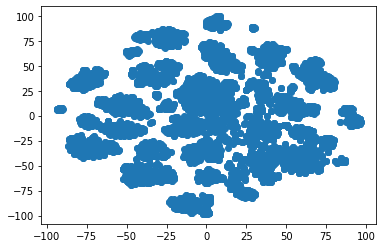

In [0]:
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], label='CASI')
plt.show()

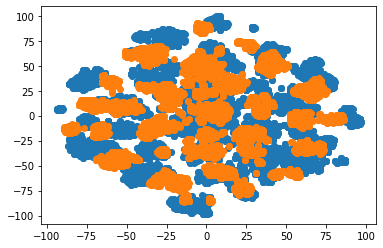

In [0]:
embedding_matrix1 = np.array([i for i in train['Abbreviation-embedding'].to_list()])
tsne_embedding1 = TSNE(n_components=2, random_state=0).fit_transform(embedding_matrix1)
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], label='CASI') # blue
plt.scatter(tsne_embedding1[:, 0], tsne_embedding1[:, 1], label='MIMIC') # orange
plt.show()

From the above, we can see that there is some overlap between the two datasets, there are not totally different. So combining the two datasets to create train, validation and test datasets isnt such a bad idea. 
The performance of the below models shows that choosing observations from both MIMIC and CASI is a good idea.

In [0]:
from sklearn.model_selection import train_test_split

# Combining train and test and splitting them randomly
full_df = pd.concat([test[['feature_vector', 'label']], combined_train_final[['feature_vector', 'label']]])
print('Size of full dataset(train and test combined) :', len(full_df))
X, Y = full_df.feature_vector.to_list(), full_df.label.to_list()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print('Train Size: ', len(X_train))
print('Test Size: ', len(X_test))

Size of full dataset(train and test combined) : 28000
Train Size:  19600
Test Size:  8400


In [0]:
# Random Forest:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy from Random Forest Classifier: ', acc)

Accuracy from Random Forest Classifier:  0.9534523809523809


In [0]:
# Logistic Regression:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
Y_prob = clf.predict_proba(X_test)
print('Train Accuracy from Logistic Regression: ', clf.score(X_train, Y_train))
print('Test Accuracy from Logistic Regression: ', accuracy_score(Y_test, Y_pred))

Train Accuracy from Logistic Regression:  0.9191836734693878
Test Accuracy from Logistic Regression:  0.9033333333333333


In [0]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Test Accuracy using Naive Bayes: ', accuracy_score(Y_test, Y_pred))

Test Accuracy using Naive Bayes:  0.5188095238095238


In [0]:
# Linear Support Vector Machine
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, Y_train)
print('Coeffs: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Y_pred = clf.predict(X_test)
print('Test Accuracy using Linear SVM: ', accuracy_score(Y_test, Y_pred))

Coeffs:  [[-0.09673647  0.00769119 -0.10766552 ... -0.96567963  4.20420792
   1.31708748]]
Intercept:  [0.27377437]
Test Accuracy using Linear SVM:  0.9576190476190476


In [0]:
# Feed forward NN (Multi Layer Perceptron):
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 10, 5, 2), random_state=1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Weight Matrix: ', [coef.shape for coef in clf.coefs_])
print('Test accuracy using MLP (NN): ', accuracy_score(Y_test, Y_pred))

Weight Matrix:  [(1268, 100), (100, 10), (10, 5), (5, 2), (2, 1)]
Test accuracy using MLP (NN):  0.9307142857142857


# Evaluation: Modify train and test to include all of MIMIC and 10% of CASI per abbr


In [0]:
def evaluate_clf(clf, training, test):
  ##return accuracy
  clf.fit(training[0], training[1])
  pred = clf.predict(test[0])
  accuracy = sum([pred[i]==test[1][i] for i in range(len(pred))])/len(pred)
  return accuracy

In [0]:
def generate_fake_data(temp_df, fakesize):  
  fake_data = temp_df.sample(fakesize)[["Abbreviation-embedding", "Long_Form"]]
  fake_data["Abbreviation-embedding"] = fake_data["Abbreviation-embedding"].apply(lambda x: ast.literal_eval(x))
  fake_data["CUI_embedding"] = fake_data["Abbreviation-embedding"].apply(lambda x: random.choice(temp_df["CUI_embedding"].tolist()))
  fake_data["CUI_embedding"] = fake_data["CUI_embedding"].apply(lambda x: ast.literal_eval(x))
  fake_data["label"] = fake_data["Abbreviation-embedding"].apply(lambda x: 0)
  fake_data["feature_vector"] = fake_data["Abbreviation-embedding"]+ fake_data["CUI_embedding"]
  return fake_data

In [0]:
def compare_without_with_data(clf, CASIsize, weight, features, labels, ttrain):
  fakesize = CASIsize*weight
  msk = np.random.rand(len(test)) < 0.75
  new_test_7500 = test[msk]
  left_over = test[~msk]
  add_data = left_over.sample(CASIsize)[["feature_vector", "label"]]
  fake_data = generate_fake_data(temp_df, fakesize)
  new_ttrain = pd.concat([ttrain]+[add_data]*weight + [fake_data])
  new_features = new_ttrain["feature_vector"].tolist()
  new_labels = new_ttrain["label"].tolist()
  
  new_accuracy = evaluate_clf(clf, [new_features, new_labels], [test["feature_vector"].tolist(), test["label"].tolist()])
  # old_accuracy = evaluate_clf(clf, [features, labels], [test["feature_vector"].tolist(), test["label"].tolist()])
  print("new accuracy is ", new_accuracy)
  # print("old accuracy is ", old_accuracy)
  return new_accuracy

In [0]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier

arr = [RandomForestClassifier(), LogisticRegressionCV(), MLPClassifier((100,100,100,100))]
randomweights = [(0,1), (20,20), (100,8), (200, 4), (400,2), (400,5), (1000,1), (1000,2), (2000,1), (2000,2)]
# randomweights=[(2000,1)]
for w in randomweights:
  for c in arr:
    print(w)
    print(c.__class__.__name__)
    compare_without_with_data(c, w[0], w[1], features, labels, ttrain)

# Visualize Abbreviation Embeddings

In [165]:
casi2.head(2)

,Unnamed: 0,Abbr,Long_Form,Abbr_In_Note,Span_Start,Span_End,Note_Section_Hdr,Note_Text,SF,LF,cui,CUI_embedding,name,Abbreviation-embedding,label
0,0,AB,abortion,AB.,231.0,233.0,NaN,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...,AB,abortion,C0156543,"[-0.0990905307120229, 0.0973064017271342, -1.3...",unspecified abortion,"[0.08746588, 0.119520985, -0.28652567, 0.32209...",1
1,1,AB,abortion,AB.,231.0,233.0,NaN,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...,AB,abortion,C0392535,"[-0.0343592538063854, 0.0245912981538109, -2.9...",induced abortion (procedure),"[0.08746588, 0.119520985, -0.28652567, 0.32209...",1


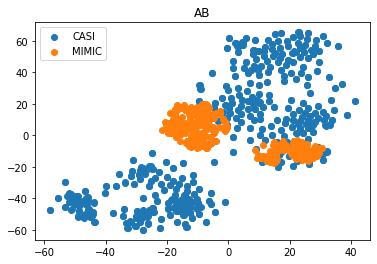

In [172]:
import matplotlib.pyplot as plt
import matplotlib

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

abbrs = train.Abbreviation.drop_duplicates().to_list()

casi_AB = casi2[casi2.Abbr == 'AB'][['Abbr', 'Long_Form', 'Abbreviation-embedding']]
mimic_AB = train[train.Abbreviation == 'AB'][['Abbreviation', 'Long-form', 'Abbreviation-embedding']].rename({'Abbreviation': 'Abbr', 'Long-form': 'Long_Form'})

embedding_matrix_casi = np.array([i for i in casi_AB['Abbreviation-embedding'].to_list()])
tsne_embedding_casi = TSNE(n_components=2, random_state=0).fit_transform(embedding_matrix_casi)

embedding_matrix_mimic = np.array([i for i in mimic_AB['Abbreviation-embedding'].to_list()])
tsne_embedding_mimic = TSNE(n_components=2, random_state=0).fit_transform(embedding_matrix_mimic)

plt.scatter(tsne_embedding_casi[:, 0], tsne_embedding_casi[:, 1], label='CASI') # blue
plt.scatter(tsne_embedding_mimic[:, 0], tsne_embedding_mimic[:, 1], label='MIMIC') # orange
plt.title('AB')
plt.legend()
plt.show()

IM: CASI long forms: ['intramuscular', 'intramedullary']
IM: MIMIC long forms: ['intramuscular', 'intramedullary']


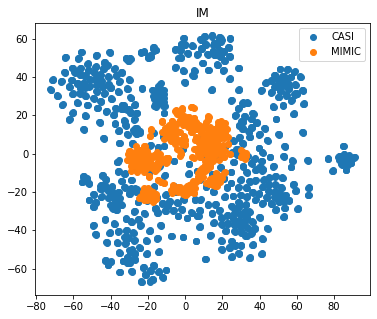

SMA: CASI long forms: ['superior mesenteric artery', 'spinal muscular atrophy', 'smooth muscle antibody']
SMA: MIMIC long forms: ['superior mesenteric artery', 'spinal muscular atrophy', 'smooth muscle actin']


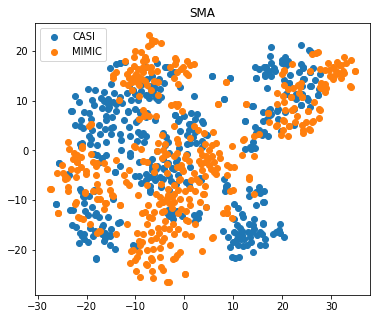

RA: CASI long forms: ['right atrium', 'rheumatoid arthritis', 'retinoic acid']
RA: MIMIC long forms: ['rheumatoid arthritis', 'retinoic acid', 'right atrium']


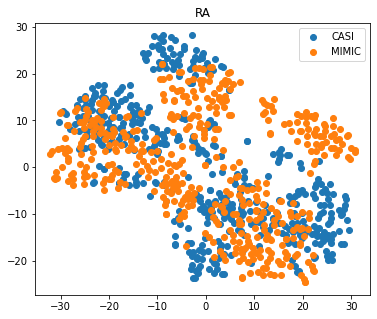

BAL: CASI long forms: ['blood alcohol level', 'bronchoalveolar lavage']
BAL: MIMIC long forms: ['bronchoalveolar lavage']


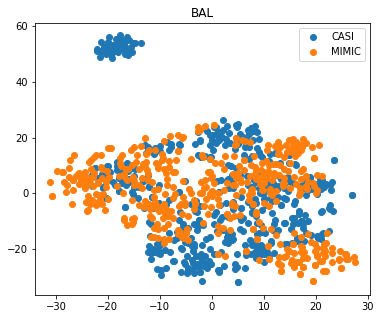

CEA: CASI long forms: ['carcinoembryonic antigen', 'carotid endarterectomy']
CEA: MIMIC long forms: ['carotid endarterectomy', 'carcinoembryonic antigen']


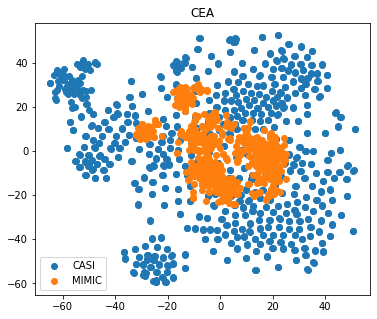

MR: CASI long forms: ['mitral regurgitation', 'medical record', 'mental retardation']
MR: MIMIC long forms: ['mental retardation', 'mitral regurgitation', 'magnetic resonance']


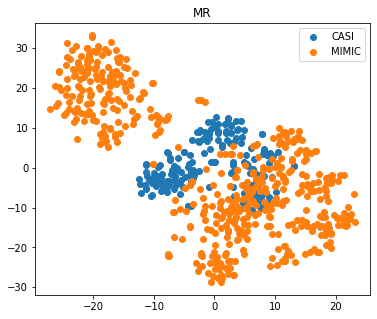

OTC: CASI long forms: ['ornithine transcarbamoylase']
OTC: MIMIC long forms: ['over the counter', 'ornithine transcarbamoylase']


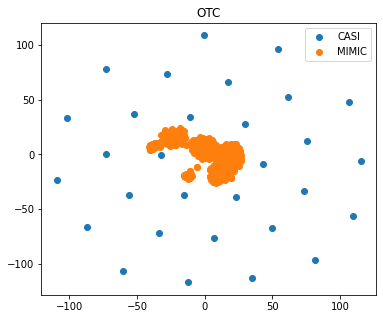

CVS: CASI long forms: []
CVS: MIMIC long forms: ['cardiovascular system']


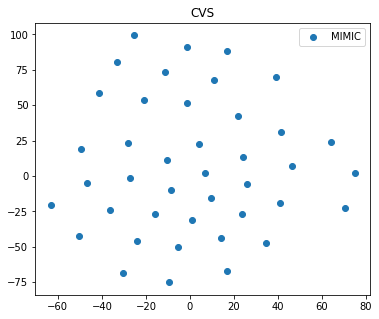

RT: CASI long forms: ['radiation therapy']
RT: MIMIC long forms: ['respiratory therapist', 'respiratory therapy', 'right']


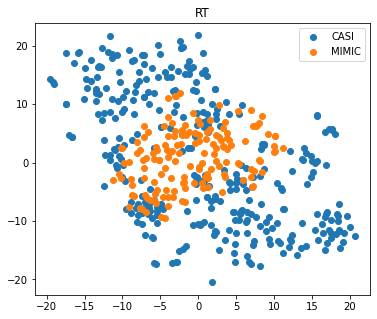

DM: CASI long forms: ['dextromethorphan', 'diabetes mellitus']
DM: MIMIC long forms: ['diabetes mellitus', 'dextromethorphan']


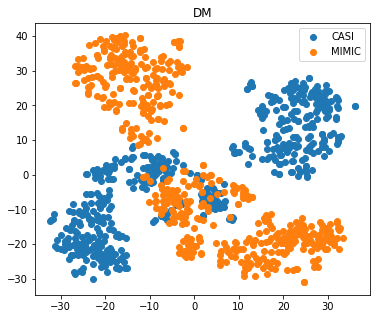

AV: CASI long forms: ['aortic valve']
AV: MIMIC long forms: ['arteriovenous', 'aortic valve', 'atrioventricular']


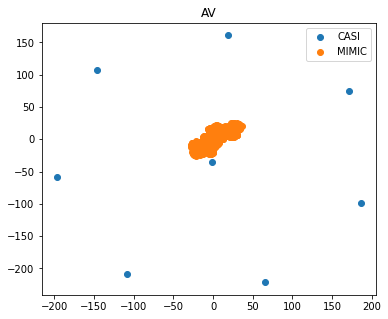

DIP: CASI long forms: ['desquamative interstitial pneumonia']
DIP: MIMIC long forms: ['desquamative interstitial pneumonia', 'dipropionate']


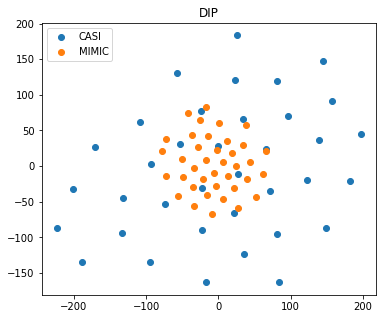

CTA: CASI long forms: []
CTA: MIMIC long forms: ['computed tomographic angiography']


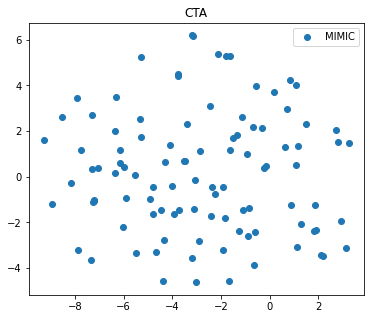

PCP: CASI long forms: ['primary care physician', 'phencyclidine']
PCP: MIMIC long forms: ['phencyclidine', 'primary care physician']


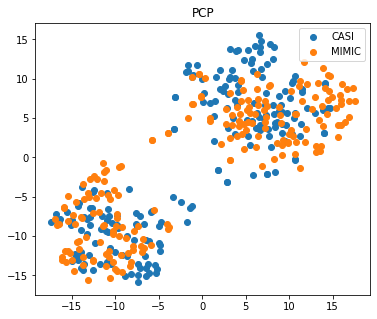

IT: CASI long forms: ['intrathecal', 'ischial tuberosity']
IT: MIMIC long forms: ['intertrochanteric', 'inspiratory time', 'intrathecal']


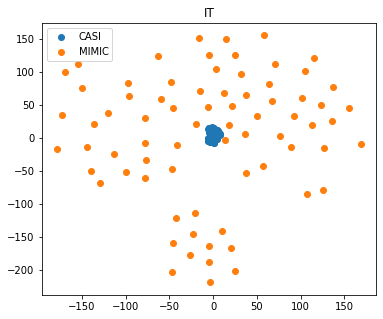

PDA: CASI long forms: ['patent ductus arteriosus', 'posterior descending artery']
PDA: MIMIC long forms: ['patent ductus arteriosus']


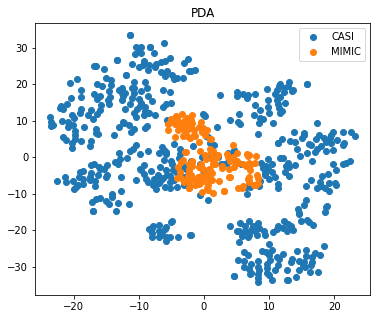

ER: CASI long forms: ['extended release', 'emergency room', 'estrogen receptor']
ER: MIMIC long forms: ['estrogen receptor']


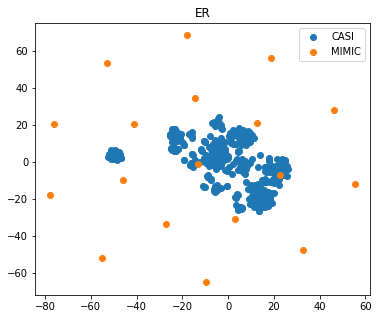

IVF: CASI long forms: ['intravenous fluid', 'in vitro fertilization']
IVF: MIMIC long forms: ['in vitro fertilization']


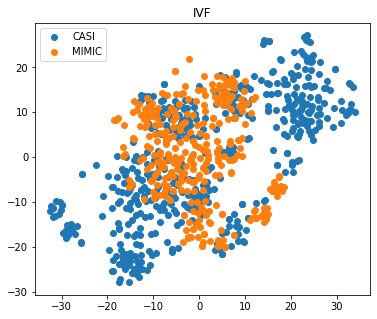

CA: CASI long forms: ['cancer', 'carbohydrate antigen', 'California']
CA: MIMIC long forms: ['cancer']


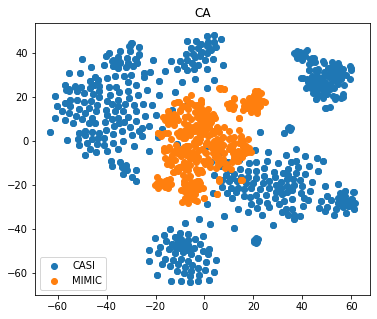

SBP: CASI long forms: ['systolic blood pressure', 'spontaneous bacterial peritonitis']
SBP: MIMIC long forms: ['spontaneous bacterial peritonitis', 'systolic blood pressure']


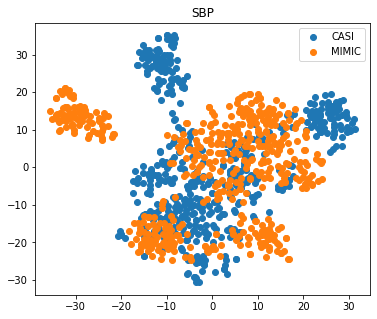

DC: CASI long forms: ['District of Columbia']
DC: MIMIC long forms: ['discharge']


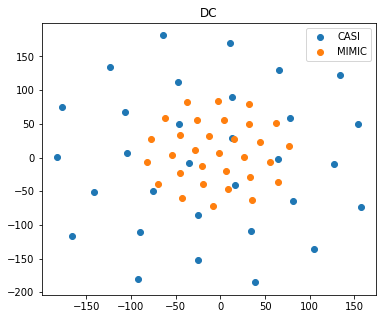

PE: CASI long forms: ['pulmonary embolus', 'pleural effusion']
PE: MIMIC long forms: ['pulmonary embolus', 'pleural effusion']


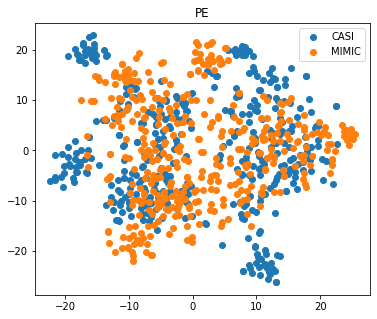

IR: CASI long forms: ['interventional radiology', 'internal rotation', 'infrared']
IR: MIMIC long forms: ['internal rotation', 'infrared', 'interventional radiology']


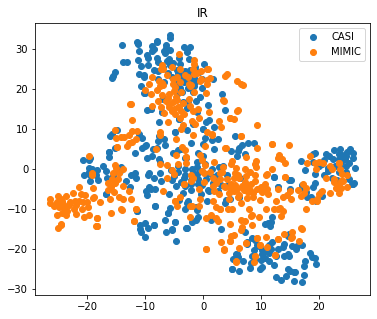

LE: CASI long forms: ['lower extremity', 'lupus erythematosus']
LE: MIMIC long forms: ['leukocyte esterase', 'lupus erythematosus', 'lymphedema', 'lower extremity']


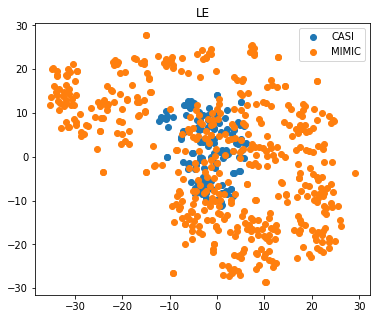

OP: CASI long forms: ['occiput posterior']
OP: MIMIC long forms: ['outpatient', 'oropharynx', 'ophthalmic', 'operative']


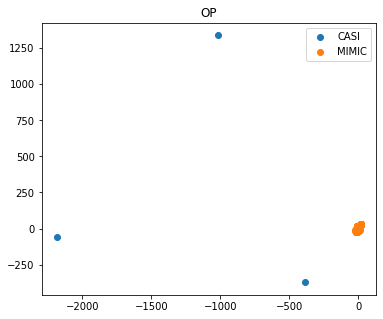

FISH: CASI long forms: ['fluorescent in situ hybridization']
FISH: MIMIC long forms: ['fluorescent in situ hybridization']


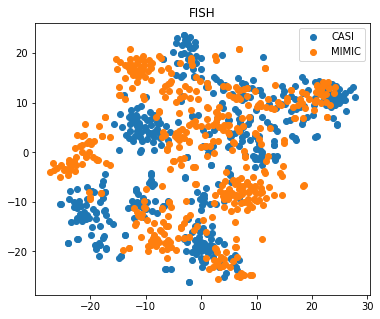

AB: CASI long forms: ['abortion']
AB: MIMIC long forms: ['arterial blood', 'abortion']


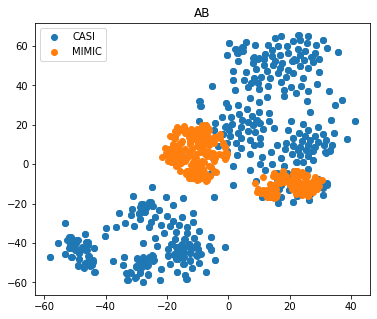

AC: CASI long forms: ['abdominal circumference', 'alternating current']
AC: MIMIC long forms: ['acetate', 'abdominal circumference', 'assist control', 'acromioclavicular']


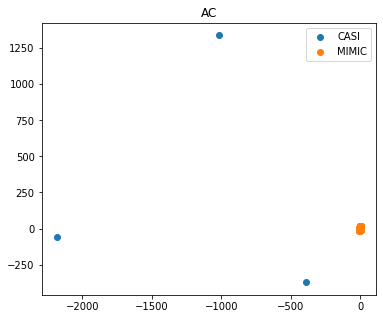

In [198]:
abbrs = train.Abbreviation.drop_duplicates().to_list()

row, col = 0, 0
for abbr in abbrs:
  casi_AB = casi2[casi2.Abbr == abbr][['Abbr', 'Long_Form', 'Abbreviation-embedding']]
  mimic_AB = train[train.Abbreviation == abbr][['Abbreviation', 'Long-form', 'Abbreviation-embedding']].rename({'Abbreviation': 'Abbr', 'Long-form': 'Long_Form'})

  print('{}: CASI long forms: {}'.format(abbr, casi_AB['Long_Form'].drop_duplicates().to_list()))
  print('{}: MIMIC long forms: {}'.format(abbr, mimic_AB['Long-form'].drop_duplicates().to_list()))

  if len(casi_AB):
    embedding_matrix_casi = np.array([i for i in casi_AB['Abbreviation-embedding'].to_list()])
    tsne_embedding_casi = TSNE(n_components=2, random_state=0).fit_transform(embedding_matrix_casi)

  if len(mimic_AB):
    embedding_matrix_mimic = np.array([i for i in mimic_AB['Abbreviation-embedding'].to_list()])
    tsne_embedding_mimic = TSNE(n_components=2, random_state=0).fit_transform(embedding_matrix_mimic)

  plt.figure(figsize=(6,5))
  if len(casi_AB):
    plt.scatter(tsne_embedding_casi[:, 0], tsne_embedding_casi[:, 1], label='CASI') # blue
  if len(mimic_AB):
    plt.scatter(tsne_embedding_mimic[:, 0], tsne_embedding_mimic[:, 1], label='MIMIC') # orange
  plt.title(abbr)
  plt.legend()
  plt.show()